In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

$\text{The objective function with constraint}$

$\mathrm{min}\{\,-\,t\mu^{\prime}x\;+\;\frac{1}{2}x^{\prime}\Sigma x\;\mid\;l^{\prime}x\;=\;1\}.$

$\text{From Definition 1.1 (see Section 1 . 1 ), the optimality conditions for (2.3) are:}$

$t\mu-\Sigma x~=~u l,~~\mathrm{and,}~~l^{\prime}x~=~1.$

$\text{From Theorem 1 . 2 (see Section 1 . 1) these conditions are both necessary
and sufficient for optimality. Solving the first for x gives}$

$x~=~-u\Sigma^{-1}l~+~t\Sigma^{-1}\mu.$

$\text{Applying the budget constraint gives a single equation for the multiplier
u:}$

$l^{\prime}x~=~1~=~-u l^{\prime}\Sigma^{-1}l~+~t l^{\prime}\Sigma^{-1}\mu,$


$\text{which has solution}$

$u\ =\ {\frac{-1}{l^{\prime}\Sigma^{-1}l}}\ +\ t{\frac{l^{\prime}\Sigma^{-1}\mu}{l^{\prime}\Sigma^{-1}l}}.$

$\text{Substituting u into (2.5) gives the efficient portfolios as explicit linear
functions of the parameter t:}$

$x\;\equiv\;x(t)\;=\;\frac{\Sigma^{-1}l}{l^{\prime}\Sigma^{-1}l}\;+\;t(\Sigma^{-1}\mu\;-\;\frac{l^{\prime}\Sigma^{-1}\mu}{l^{\prime}\Sigma^{-1}l}\Sigma^{-1}l).$

$h_{0}\ =\ \frac{\Sigma^{-1}l}{l^{\prime}\Sigma^{-1}l}\ \ \mathrm{and}\ \ h_{1}\ =\ \Sigma^{-1}\mu\ -\ \frac{l^{\prime}\Sigma^{-1}\mu}{l^{\prime}\Sigma^{-1}l}\Sigma^{-1}l.$

$\text{Then the efficient portfolios are}$

$x(t)~=~h_{0}~+~t h_{1}.$

$\mu_{p}\;=\;\mu^{\prime}x(t)\;=\;\mu^{\prime}h_{0}\;+\;t\mu^{\prime}h_{1},$

$\begin{array}{l l l l}{{\sigma_{p}^{2}}}&{{=}}&{{\left(h_{0}\ +\ t h_{1}\right)^{\prime}\Sigma(h_{0}\ +\ t h_{1})}}\\ {{}}&{{=}}&{{h_{0}^{\prime}\Sigma h_{0}\ +\ 2t h_{1}^{\prime}\Sigma h_{0}\ +\ t^{2}h_{1}^{\prime}\Sigma h_{1}}}\end{array}$

$\alpha_{0}\ =\ \mu^{\prime}h_{0},\ \ \alpha_{1}\ =\ \mu^{\prime}h_{1}$

$\begin{array}{l}{{\beta_{0}}}\end{array}=\left.h_{0}^{\prime}\Sigma h_{0},\ \ \beta_{1}\ =\ h_{1}^{\prime}\Sigma h_{0}\ \ \mathrm{and}\ \ \beta_{2}\ =\ h_{1}^{\prime}\Sigma h_{1}.\right.$

$\text{From (2.9) , (2. 10) , (2. 1 1 ) and (2. 12) , we now
have}$

$\mu_{p}~=~\alpha_{0}~+~\alpha_{1}t~~\mathrm{and}~~\sigma_{p}^{2}~=~\beta_{0}~+~2\beta_{1}t~+~\beta_{2}t^{2},$

$\text{Finally , we now
have}$

$\sigma_{p}^{2}\ -\ \beta_{0}\ =\ \left(\mu_{p}\ -\ \alpha_{0}\right)^{2}/\alpha_{1}.$

In [22]:
n = 3
mu = np.array([1.1, 1.2, 1.3]).reshape(-1, 1)
cov = [[10**-2, 0 , 0], [0, 5*10**-2 , 0], [0, 0 , 7*10**-2]]
l = np.ones(n).reshape(-1, 1)

In [23]:
np.linalg.inv(cov)

array([[100.        ,   0.        ,   0.        ],
       [  0.        ,  20.        ,   0.        ],
       [  0.        ,   0.        ,  14.28571429]])

In [25]:
h0 = (np.linalg.inv(cov) @ l) / (np.transpose(l) @ np.linalg.inv(cov) @ l)
h0

array([[0.74468085],
       [0.14893617],
       [0.10638298]])

In [36]:
# check budget constraint (should be 1)
np.transpose(l) @ h0

array([[1.]])

In [40]:
h1 = np.linalg.inv(cov) @ mu - (np.transpose(l) @ np.linalg.inv(cov) @ mu) * h0
h1

array([[-3.61702128],
       [ 1.27659574],
       [ 2.34042553]])

In [41]:
# check budget constraint (should be 0)
np.transpose(l) @ h1

array([[7.10542736e-15]])

In [42]:
a0 = np.transpose(mu) @ h0
a0

array([[1.13617021]])

In [43]:
a1 = np.transpose(mu) @ h1
a1

array([[0.59574468]])

In [44]:
b0 = np.transpose(h0) @ cov @ h0
b0

array([[0.00744681]])

In [45]:
b1 = np.transpose(h0) @ cov @ h1
b1

array([[4.85722573e-17]])

In [46]:
b2 = np.transpose(h1) @ cov @ h1
b2

array([[0.59574468]])

In [48]:
mu_p = np.linspace(0, 2, 50)

In [51]:
sigma_p2 = b0 + (mu_p - a0) ** 2 / a1

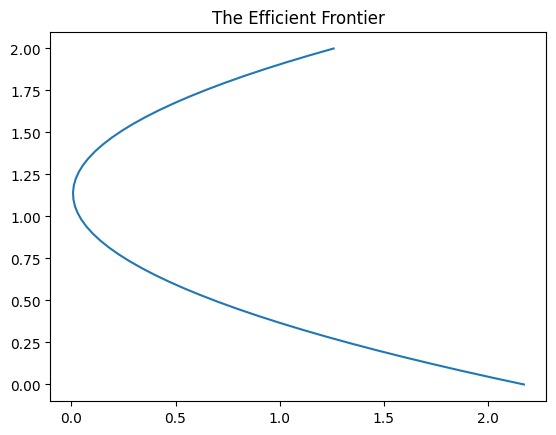

In [59]:
plt.title('The Efficient Frontier')
plt.plot(sigma_p2.reshape(-1), mu_p)